## Work out mass and volumes needed for Moonshot amide coupling trial

## 1. Start by loading input spreadsheet - for this round will use 2 x reactants input of: name, location, comments, SMILES and	solubility

In [1]:
import pandas as pd
import sys
sys.path.append('..')
from xchemOT.reactions import Reactant, Reaction

In [2]:
# Import the chemist's input - Sheet 1 are the reactant 1 and Sheet 2 is for reactant 2
react1_df = pd.read_excel('data/Moonshot_amide_coupling.xlsx', sheet_name='React_1')
react2_df = pd.read_excel('data/Moonshot_amide_coupling.xlsx', sheet_name='React_2')

In [3]:
react1_df

,Name,SMILES,location,comments,solubility
0,"1-[(tert-butoxy)carbonyl]-4,4-difluoropyrrolid...",CC(C)(C)OC(=O)N1CC(F)(F)CC1C(=O)O,RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Fr...,C2,0.8
1,"3-Hydroxyphenylacetic acid, 99+%",O=C(O)Cc1cccc(O)c1,RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,None,0.8
2,"3-Hydroxyphenylacetic acid, 99+%",O=C(O)Cc1cccc(O)c1,RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,None,0.8
3,"3-Hydroxyphenylacetic acid, 99+%",O=C(O)Cc1cccc(O)c1,RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,None,0.8
4,"3-Hydroxyphenylacetic acid, 99+%",O=C(O)Cc1cccc(O)c1,RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,None,0.8
...,...,...,...,...,...
91,"o-Tolylacetic acid, 99%",Cc1ccccc1CC(=O)O,RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,None,0.8
92,"o-Tolylacetic acid, 99%",Cc1ccccc1CC(=O)O,RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,None,0.8
93,"o-Tolylacetic acid, 99%",Cc1ccccc1CC(=O)O,RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,None,0.8
94,"o-Tolylacetic acid, 99%",Cc1ccccc1CC(=O)O,RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,None,0.8


In [4]:
# Convert the two imported dataframes into reactant objects using the Reactant class
react1 = react1_df.apply(lambda row: Reactant(row.Name,row.SMILES,row.location,row.comments,row.solubility), axis =1)
react2 = react2_df.apply(lambda row: Reactant(row.Name,row.SMILES,row.location,row.comments,row.solubility), axis =1)

In [6]:
# Predict product using IBM API
# reactions = [Reaction(productmass=0.01, reactants=[react1,react2], product=None) for react1,react2 in zip(react1,react2)]

Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. M

Unexpected error.
{"payload":null,"metadata":{"uiMessages":{"errors":[],"infos":[],"warnings":[]},"extendedPagination":{}}}


'prediction_id'
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5


Unexpected error.
{"payload":null,"metadata":{"uiMessages":{"errors":[],"infos":[],"warnings":[]},"extendedPagination":{}}}


'prediction_id'
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5


Unexpected error.
{"payload":null,"metadata":{"uiMessages":{"errors":[],"infos":[],"warnings":[]},"extendedPagination":{}}}


'prediction_id'
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5
Too many requests per minute. Maximum supported: 5


In [10]:
# Let's save the reactions in case we want to use them later
import pickle

def load_data():
    try:
        with open("data/reactions.dat", "rb") as f:
            reactions = pickle.load(f)
            return reactions
    except Exception as e:
        print(e)

def save_data(data):
    with open("data/reactions.dat", "wb") as f:
        pickle.dump(data, f)        

In [11]:
# Save the list of reaction objects
# save_data(reactions)

In [30]:
# Load reactions data
reactions_data = load_data()

In [32]:
from rdkit import Chem
from rdkit.Chem import Draw
# Let's have a look at the products predicted using the IBM API
mols = [Chem.MolFromSmiles(reaction.product) for reaction in reactions_data]

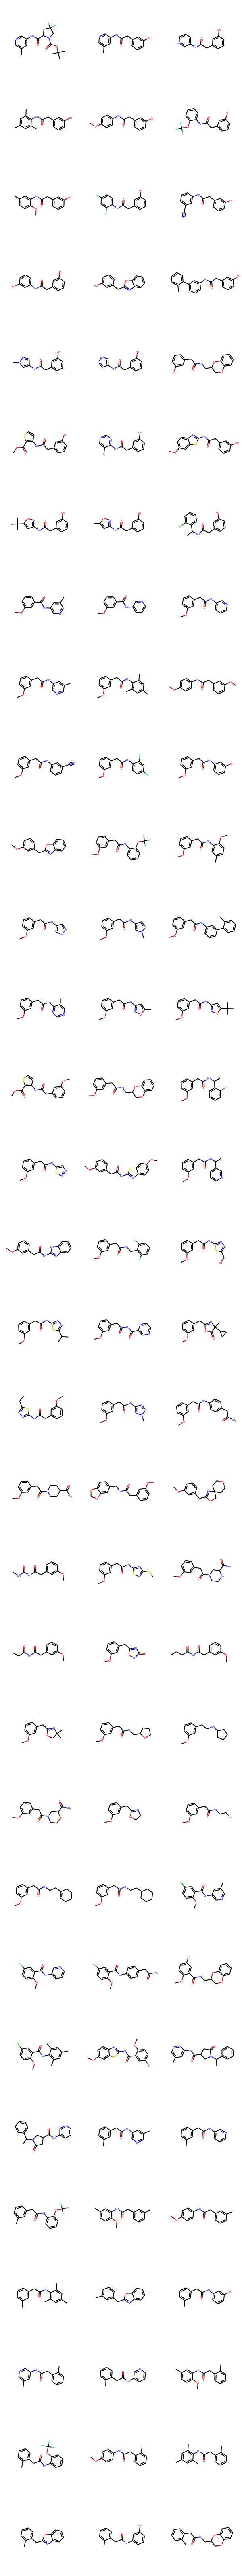

In [33]:
# Draw the mols
Draw.MolsToGridImage(mols)

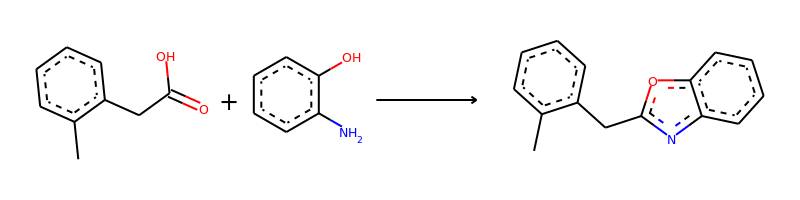

In [36]:
reactions_data[93].drawReaction()

In [37]:
reactions_data[93].reactionsmiles

'Cc1ccccc1CC(=O)O.Nc1ccccc1O'

In [16]:
# Update reaction objects to include reaction images and get reaction mass/volumes
for react in reactions_data:
    react.drawReaction(), react.getReactantAmounts()

In [17]:
reactions_dict = [react.getDictionary() for react in reactions_data]

In [18]:
# Creat the dataframe from the list of dicts
reactions_df = pd.DataFrame(reactions_dict)

In [19]:
reactions_df

,Product_SMILES,Product_mass,React_1_name,React_1_location,React_1_mass,React_1_vol,React_2_name,React_2_location,React_2_mass,React_2_vol
0,Cc1cncc(NC(=O)C2CC(F)(F)CN2C(=O)OC(C)(C)C)c1,0.01,"1-[(tert-butoxy)carbonyl]-4,4-difluoropyrrolid...",RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Fr...,0.007360,0.036640,5-methylpyridin-3-amine,RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,0.003168,0.036640
1,Cc1cncc(NC(=O)Cc2cccc(O)c2)c1,0.01,"3-Hydroxyphenylacetic acid, 99+%",RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,0.006280,0.051630,5-methylpyridin-3-amine,RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,0.004464,0.051630
2,O=C(Cc1cccc(O)c1)Nc1cccnc1,0.01,"3-Hydroxyphenylacetic acid, 99+%",RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,0.006666,0.054803,pyridin-3-amine,RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,0.004124,0.054803
3,Cc1cc(C)c(NC(=O)Cc2cccc(O)c2)c(C)c1,0.01,"3-Hydroxyphenylacetic acid, 99+%",RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,0.005649,0.046444,"2,4,6-trimethylaniline",RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,0.005020,0.046444
4,COc1ccc(NC(=O)Cc2cccc(O)c2)cc1,0.01,"3-Hydroxyphenylacetic acid, 99+%",RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,0.005914,0.048618,4-methoxyaniline,RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,0.004787,0.048618
...,...,...,...,...,...,...,...,...,...,...
91,COc1ccc(NC(=O)Cc2ccccc2C)cc1,0.01,"o-Tolylacetic acid, 99%",RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,0.005882,0.048995,4-methoxyaniline,RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,0.004824,0.048995
92,Cc1cc(C)c(NC(=O)Cc2ccccc2C)c(C)c1,0.01,"o-Tolylacetic acid, 99%",RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,0.005617,0.046788,"2,4,6-trimethylaniline",RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,0.005057,0.046788
93,Cc1ccccc1Cc1nc2ccccc2o1,0.01,"o-Tolylacetic acid, 99%",RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,0.006727,0.056029,2-aminophenol,RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,0.004888,0.056029
94,Cc1ccccc1CC(=O)Nc1cccc(O)c1,0.01,"o-Tolylacetic acid, 99%",RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,0.006224,0.051843,3-aminophenol,RCaH XChem > RCaH XChem > RCaH_1.27_XChem > Ye...,0.004523,0.051843


In [20]:
# Need to calc total mass/volume for each reagent
# Calc for reactant 1 first
def getAmounts(df,react_name):
    grouped = df.groupby(react_name + '_name')
    dict_list = []

    for name, group in grouped:
        # Get mass in mg
        total_mass = group[react_name + '_mass'].sum() * 1000
        # Volume is in ml 
        total_volume = group[react_name + '_vol'].sum()
        add_dict = {
            react_name + '_name': name,
            react_name + '_mass': total_mass,
            react_name + '_vol': total_volume
        }
        
        dict_list.append(add_dict)
    
    return pd.DataFrame(dict_list)

In [21]:
react_1_prep = getAmounts(reactions_df, 'React_1')
react_2_prep = getAmounts(reactions_df, 'React_2')

In [22]:
react_1_prep

,React_1_name,React_1_mass,React_1_vol
0,"1-[(tert-butoxy)carbonyl]-4,4-difluoropyrrolid...",7.360198,0.036640
1,"3-Hydroxyphenylacetic acid, 99+%",115.662690,0.950877
2,"3-Methoxyphenylacetic acid, 99.5%",300.829160,2.264421
3,3-methoxybenzoyl chloride,14.476080,0.106433
4,5-chloro-2-methoxybenzoyl chloride,40.299379,0.246963
5,5-oxo-1-(1-phenylethyl)pyrrolidine-3-carboxyli...,14.753483,0.079114
6,"m-Tolylacetic acid, 97%",47.767099,0.397879
7,"o-Tolylacetic acid, 99%",52.817575,0.439947


In [23]:
react_2_prep

,React_2_name,React_2_mass,React_2_vol
0,(2-chloro-6-fluorophenyl)methanamine,5.178663,0.040706
1,(4-aminooxan-4-yl)methanol,5.020157,0.047868
2,"(5-amino-1,3,4-thiadiazol-2-yl)methanol",4.694750,0.044792
3,"1,2,3-thiadiazol-5-amine",4.055485,0.050189
4,1-(2-chlorophenyl)ethan-1-amine,10.478880,0.084480
5,1-(pyridin-3-yl)ethan-1-amine,4.519354,0.046273
6,1-methyl-1H-pyrazol-4-amine,8.159986,0.105085
7,"1H-1,3-benzodiazol-2-amine",4.733412,0.044466
8,1H-pyrazol-4-amine,7.419211,0.111670
9,2'-Methyl-biphenyl-3-ylamine hydrochloride,11.302839,0.077161


In [24]:
# Write info to csv for printing
react_1_prep.to_csv('data/react_1_prep.csv', index=False)
react_2_prep.to_csv('data/react_2_prep.csv', index=False)